# 📊 Superstore Sales & Profit Analysis
## Professional Data Analyst Portfolio Project

**Author:** yusufehtesham29  
**Date:** 2026-02-12  
**Tools:** Python, SQL (SQLite), Pandas, Matplotlib

---

## 🎯 Project Objective

Perform comprehensive business analysis on Superstore sales data using SQL for querying and Python for visualization. Extract actionable insights to improve profitability and identify growth opportunities.

---

## 📋 Table of Contents

1. [Setup & Imports](#setup)
2. [Database Connection](#database)
3. [Data Overview](#overview)
4. [Business Performance Analysis](#business)
5. [Regional Analysis](#regional)
6. [Product Analysis](#product)
7. [Customer Analysis](#customer)
8. [Key Insights & Recommendations](#insights)

---

<a id='setup'></a>
## 1️⃣ Setup & Imports

**What we're doing:**
- Importing necessary Python libraries
- pandas: For data manipulation
- sqlite3: For database connection
- matplotlib: For creating visualizations
- Setting display options for better output

In [2]:
# Import libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set matplotlib style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Libraries imported successfully!")
print(f"   Pandas version: {pd.__version__}")

✅ Libraries imported successfully!
   Pandas version: 3.0.0


<a id='database'></a>
## 2️⃣ Database Connection

**What we're doing:**
- Connecting to the SQLite database we created earlier
- This database contains all the Superstore data
- We'll use SQL queries to fetch data into pandas DataFrames

In [3]:
# Connect to database
conn = sqlite3.connect('../database/superstore.db')

# Test connection by counting rows
test_query = "SELECT COUNT(*) as total_rows FROM superstore"
result = pd.read_sql_query(test_query, conn)

print("✅ Database connection established!")
print(f"   Total records in database: {result['total_rows'].values[0]:,}")

✅ Database connection established!
   Total records in database: 9,994


<a id='overview'></a>
## 3️⃣ Data Overview

**What we're doing:**
- Getting a quick overview of the dataset
- Understanding the structure and content
- Viewing sample records

In [4]:
# Query to get sample data
sample_query = """
SELECT * FROM superstore LIMIT 5
"""

df_sample = pd.read_sql_query(sample_query, conn)
print("📊 Sample Data (First 5 rows):")
display(df_sample)

📊 Sample Data (First 5 rows):


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,2016-11-08 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,2016-06-12 00:00:00,2016-06-16 00:00:00,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,2015-10-11 00:00:00,2015-10-18 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,2015-10-11 00:00:00,2015-10-18 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [5]:
# Get column information
columns_query = "PRAGMA table_info(superstore)"
df_columns = pd.read_sql_query(columns_query, conn)

print("📋 Dataset Structure:")
print(f"   Total Columns: {len(df_columns)}")
print("\nColumn Details:")
display(df_columns[['name', 'type']])

📋 Dataset Structure:
   Total Columns: 21

Column Details:


,name,type
0,row_id,INTEGER
1,order_id,TEXT
2,order_date,TIMESTAMP
3,ship_date,TIMESTAMP
4,ship_mode,TEXT
5,customer_id,TEXT
6,customer_name,TEXT
7,segment,TEXT
8,country,TEXT
9,city,TEXT


<a id='business'></a>
## 4️⃣ Business Performance Analysis

**What we're analyzing:**
- Overall business metrics (Total Sales, Profit, Margins)
- Year-over-year performance
- Identifying trends and growth patterns

In [6]:
# Query: Overall Business Performance
business_query = """
SELECT 
    COUNT(DISTINCT order_id) AS total_orders,
    COUNT(DISTINCT customer_id) AS total_customers,
    ROUND(SUM(sales), 2) AS total_sales,
    ROUND(SUM(profit), 2) AS total_profit,
    ROUND(SUM(profit) / SUM(sales) * 100, 2) AS profit_margin_percent,
    SUM(quantity) AS total_quantity_sold,
    ROUND(AVG(sales), 2) AS avg_order_value
FROM superstore
"""

df_business = pd.read_sql_query(business_query, conn)

print("="*60)
print("📈 OVERALL BUSINESS PERFORMANCE")
print("="*60)
display(df_business)

print("\n💡 Key Insights:")
print(f"   💰 Total Revenue: ${df_business['total_sales'].values[0]:,.2f}")
print(f"   📊 Total Profit: ${df_business['total_profit'].values[0]:,.2f}")
print(f"   📈 Profit Margin: {df_business['profit_margin_percent'].values[0]:.2f}%")
print(f"   🛒 Total Orders: {df_business['total_orders'].values[0]:,}")
print(f"   👥 Unique Customers: {df_business['total_customers'].values[0]:,}")
print(f"   💵 Average Order Value: ${df_business['avg_order_value'].values[0]:,.2f}")

📈 OVERALL BUSINESS PERFORMANCE


,total_orders,total_customers,total_sales,total_profit,profit_margin_percent,total_quantity_sold,avg_order_value
0,5009,793,2297200.86,286397.02,12.47,37873,229.86



💡 Key Insights:
   💰 Total Revenue: $2,297,200.86
   📊 Total Profit: $286,397.02
   📈 Profit Margin: 12.47%
   🛒 Total Orders: 5,009
   👥 Unique Customers: 793
   💵 Average Order Value: $229.86


In [7]:
# Query: Sales and Profit by Year
yearly_query = """
SELECT 
    CAST(strftime('%Y', order_date) AS INTEGER) AS year,
    COUNT(DISTINCT order_id) AS orders,
    ROUND(SUM(sales), 2) AS total_sales,
    ROUND(SUM(profit), 2) AS total_profit,
    ROUND(SUM(profit) / SUM(sales) * 100, 2) AS profit_margin_percent
FROM superstore
GROUP BY year
ORDER BY year
"""

df_yearly = pd.read_sql_query(yearly_query, conn)

print("📅 Year-over-Year Performance:")
display(df_yearly)

# Visualization: Sales and Profit by Year
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Sales by Year
ax1.bar(df_yearly['year'], df_yearly['total_sales'], color='steelblue', alpha=0.7)
ax1.set_title('Total Sales by Year', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales ($)')
ax1.grid(axis='y', alpha=0.3)
for i, v in enumerate(df_yearly['total_sales']):
    ax1.text(i, v, f'${v:,.0f}', ha='center', va='bottom')

# Profit by Year
ax2.bar(df_yearly['year'], df_yearly['total_profit'], color='green', alpha=0.7)
ax2.set_title('Total Profit by Year', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Profit ($)')
ax2.grid(axis='y', alpha=0.3)
for i, v in enumerate(df_yearly['total_profit']):
    ax2.text(i, v, f'${v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('../visualizations/01_yearly_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💡 Insight: Year-over-year sales trend shows business growth trajectory")

📅 Year-over-Year Performance:


,year,orders,total_sales,total_profit,profit_margin_percent
0,2014,969,484247.50,49543.97,10.23
1,2015,1038,470532.51,61618.60,13.10
2,2016,1315,609205.60,81795.17,13.43
3,2017,1687,733215.26,93439.27,12.74



💡 Insight: Year-over-year sales trend shows business growth trajectory


<a id='regional'></a>
## 5️⃣ Regional Analysis

**What we're analyzing:**
- Performance across different regions
- Identifying top-performing and underperforming regions
- Understanding geographic revenue distribution

🌎 Regional Performance:


,region,orders,total_sales,total_profit,profit_margin_percent
0,West,1611,725457.82,108418.45,14.94
1,East,1401,678781.24,91522.78,13.48
2,Central,1175,501239.89,39706.36,7.92
3,South,822,391721.91,46749.43,11.93


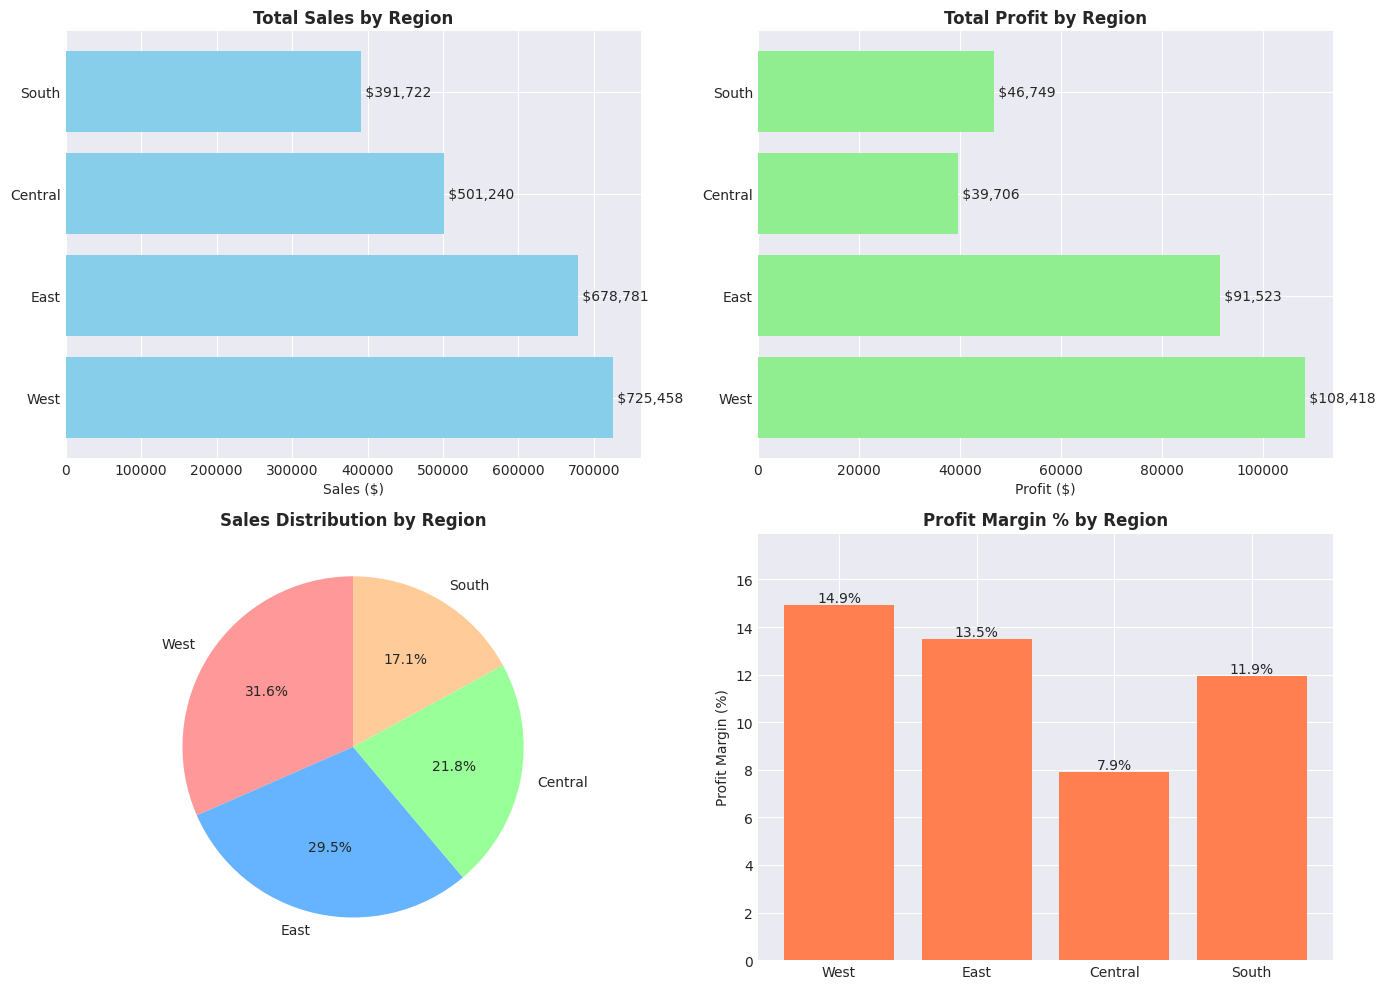


💡 Insight: West region leads in sales with $725,457.82


In [8]:
# Query: Sales and Profit by Region
regional_query = """
SELECT 
    region,
    COUNT(DISTINCT order_id) AS orders,
    ROUND(SUM(sales), 2) AS total_sales,
    ROUND(SUM(profit), 2) AS total_profit,
    ROUND(SUM(profit) / SUM(sales) * 100, 2) AS profit_margin_percent
FROM superstore
GROUP BY region
ORDER BY total_sales DESC
"""

df_regional = pd.read_sql_query(regional_query, conn)

print("🌎 Regional Performance:")
display(df_regional)

# Visualization: Regional Performance
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sales by Region (Bar Chart)
axes[0, 0].barh(df_regional['region'], df_regional['total_sales'], color='skyblue')
axes[0, 0].set_title('Total Sales by Region', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Sales ($)')
for i, v in enumerate(df_regional['total_sales']):
    axes[0, 0].text(v, i, f' ${v:,.0f}', va='center')

# Profit by Region (Bar Chart)
axes[0, 1].barh(df_regional['region'], df_regional['total_profit'], color='lightgreen')
axes[0, 1].set_title('Total Profit by Region', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Profit ($)')
for i, v in enumerate(df_regional['total_profit']):
    axes[0, 1].text(v, i, f' ${v:,.0f}', va='center')

# Sales Distribution (Pie Chart)
axes[1, 0].pie(df_regional['total_sales'], labels=df_regional['region'], 
               autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
axes[1, 0].set_title('Sales Distribution by Region', fontsize=12, fontweight='bold')

# Profit Margin by Region
axes[1, 1].bar(df_regional['region'], df_regional['profit_margin_percent'], color='coral')
axes[1, 1].set_title('Profit Margin % by Region', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Profit Margin (%)')
axes[1, 1].set_ylim(0, max(df_regional['profit_margin_percent']) * 1.2)
for i, v in enumerate(df_regional['profit_margin_percent']):
    axes[1, 1].text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('../visualizations/02_regional_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n💡 Insight: {df_regional.iloc[0]['region']} region leads in sales with ${df_regional.iloc[0]['total_sales']:,.2f}")

<a id='product'></a>
## 6️⃣ Product Analysis

**What we're analyzing:**
- Category and sub-category performance
- Identifying profitable vs unprofitable products
- Understanding product mix and discount impact

📦 Category Performance:


,category,total_sales,total_profit,profit_margin_percent,units_sold
0,Technology,836154.03,145454.95,17.40,6939
1,Office Supplies,719047.03,122490.80,17.04,22906
2,Furniture,741999.80,18451.27,2.49,8028


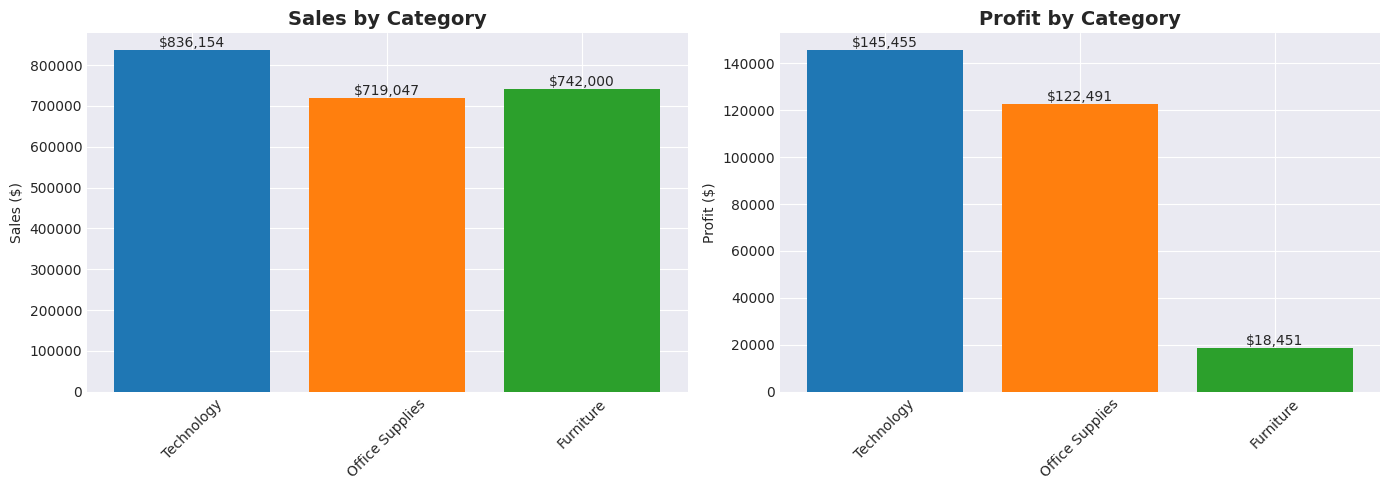

In [9]:
# Query: Sales by Category
category_query = """
SELECT 
    category,
    ROUND(SUM(sales), 2) AS total_sales,
    ROUND(SUM(profit), 2) AS total_profit,
    ROUND(SUM(profit) / SUM(sales) * 100, 2) AS profit_margin_percent,
    SUM(quantity) AS units_sold
FROM superstore
GROUP BY category
ORDER BY total_profit DESC
"""

df_category = pd.read_sql_query(category_query, conn)

print("📦 Category Performance:")
display(df_category)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Sales by Category
ax1.bar(df_category['category'], df_category['total_sales'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax1.set_title('Sales by Category', fontsize=14, fontweight='bold')
ax1.set_ylabel('Sales ($)')
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(df_category['total_sales']):
    ax1.text(i, v, f'${v:,.0f}', ha='center', va='bottom')

# Profit by Category
ax2.bar(df_category['category'], df_category['total_profit'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax2.set_title('Profit by Category', fontsize=14, fontweight='bold')
ax2.set_ylabel('Profit ($)')
ax2.tick_params(axis='x', rotation=45)
for i, v in enumerate(df_category['total_profit']):
    ax2.text(i, v, f'${v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('../visualizations/03_category_performance.png', dpi=300, bbox_inches='tight')
plt.show()

⚠️  LOSS-MAKING SUB-CATEGORIES (Critical Finding!):


,category,sub_category,total_sales,total_profit,profit_margin_percent
0,Furniture,Tables,206965.53,-17725.48,-8.56
1,Furniture,Bookcases,114880.00,-3472.56,-3.02
2,Office Supplies,Supplies,46673.54,-1189.10,-2.55


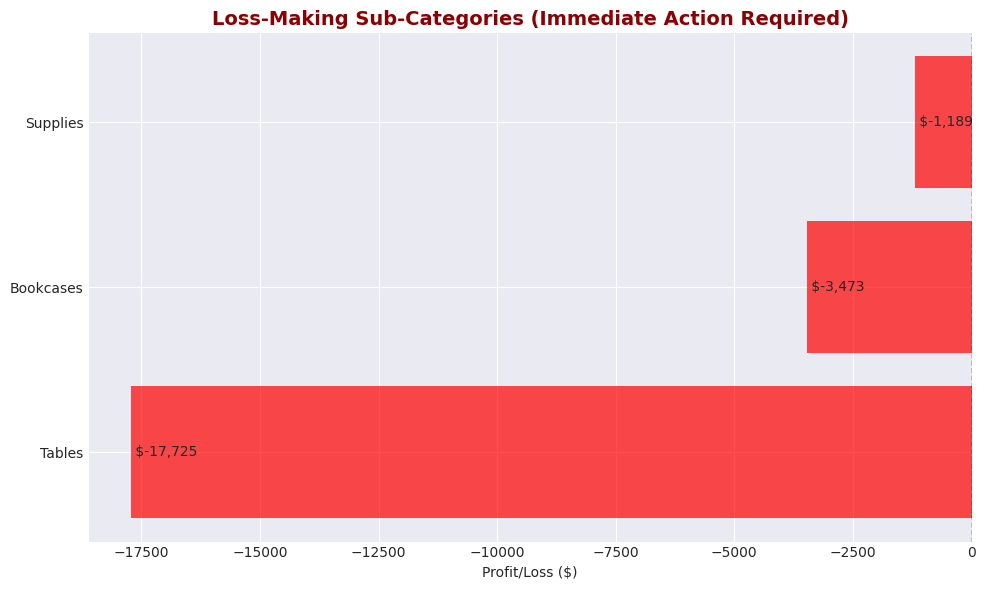


🚨 Critical Insight: 3 sub-categories are LOSING MONEY!
   Total Loss: $-22,387.14
   Worst Performer: Tables ($-17,725.48)


In [10]:
# Query: Loss-Making Sub-Categories
loss_query = """
SELECT 
    category,
    sub_category,
    ROUND(SUM(sales), 2) AS total_sales,
    ROUND(SUM(profit), 2) AS total_profit,
    ROUND(SUM(profit) / SUM(sales) * 100, 2) AS profit_margin_percent
FROM superstore
GROUP BY category, sub_category
HAVING SUM(profit) < 0
ORDER BY total_profit ASC
"""

df_loss = pd.read_sql_query(loss_query, conn)

print("⚠️  LOSS-MAKING SUB-CATEGORIES (Critical Finding!):")
display(df_loss)

if len(df_loss) > 0:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(df_loss['sub_category'], df_loss['total_profit'], color='red', alpha=0.7)
    ax.set_title('Loss-Making Sub-Categories (Immediate Action Required)', 
                 fontsize=14, fontweight='bold', color='darkred')
    ax.set_xlabel('Profit/Loss ($)')
    ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
    for i, v in enumerate(df_loss['total_profit']):
        ax.text(v, i, f' ${v:,.0f}', va='center')
    
    plt.tight_layout()
    plt.savefig('../visualizations/04_loss_making_products.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n🚨 Critical Insight: {len(df_loss)} sub-categories are LOSING MONEY!")
    print(f"   Total Loss: ${df_loss['total_profit'].sum():,.2f}")
    print(f"   Worst Performer: {df_loss.iloc[0]['sub_category']} (${df_loss.iloc[0]['total_profit']:,.2f})")
else:
    print("✅ No loss-making sub-categories found!")

<a id='customer'></a>
## 7️⃣ Customer Analysis

**What we're analyzing:**
- Customer segmentation (Consumer, Corporate, Home Office)
- Top customers by sales and profit
- Customer behavior patterns

👥 Customer Segmentation:


,segment,total_customers,total_orders,total_sales,total_profit,avg_order_value
0,Consumer,409,2586,1161401.34,134119.21,223.73
1,Corporate,236,1514,706146.37,91979.13,233.82
2,Home Office,148,909,429653.15,60298.68,240.97


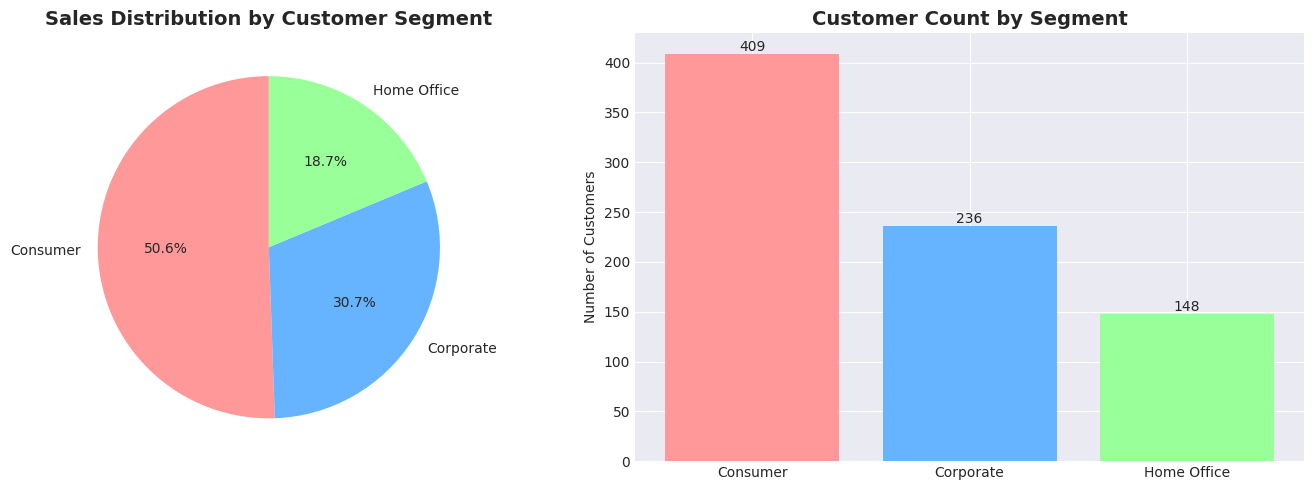


💡 Insight: Consumer segment is the largest revenue contributor


In [11]:
# Query: Customer Segmentation
segment_query = """
SELECT 
    segment,
    COUNT(DISTINCT customer_id) AS total_customers,
    COUNT(DISTINCT order_id) AS total_orders,
    ROUND(SUM(sales), 2) AS total_sales,
    ROUND(SUM(profit), 2) AS total_profit,
    ROUND(AVG(sales), 2) AS avg_order_value
FROM superstore
GROUP BY segment
ORDER BY total_sales DESC
"""

df_segment = pd.read_sql_query(segment_query, conn)

print("👥 Customer Segmentation:")
display(df_segment)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Sales by Segment
ax1.pie(df_segment['total_sales'], labels=df_segment['segment'], 
        autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
ax1.set_title('Sales Distribution by Customer Segment', fontsize=14, fontweight='bold')

# Customer Count by Segment
ax2.bar(df_segment['segment'], df_segment['total_customers'], color=['#ff9999','#66b3ff','#99ff99'])
ax2.set_title('Customer Count by Segment', fontsize=14, fontweight='bold')
ax2.set_ylabel('Number of Customers')
for i, v in enumerate(df_segment['total_customers']):
    ax2.text(i, v, f'{v:,}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('../visualizations/05_customer_segmentation.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n💡 Insight: {df_segment.iloc[0]['segment']} segment is the largest revenue contributor")

🏆 Top 10 Customers by Sales:


,customer_name,total_orders,total_sales,total_profit
0,Sean Miller,5,25043.05,-1980.74
1,Tamara Chand,5,19052.22,8981.32
2,Raymond Buch,6,15117.34,6976.10
3,Tom Ashbrook,4,14595.62,4703.79
4,Adrian Barton,10,14473.57,5444.81
5,Ken Lonsdale,12,14175.23,806.85
6,Sanjit Chand,9,14142.33,5757.41
7,Hunter Lopez,6,12873.30,5622.43
8,Sanjit Engle,11,12209.44,2650.68
9,Christopher Conant,5,12129.07,2177.05


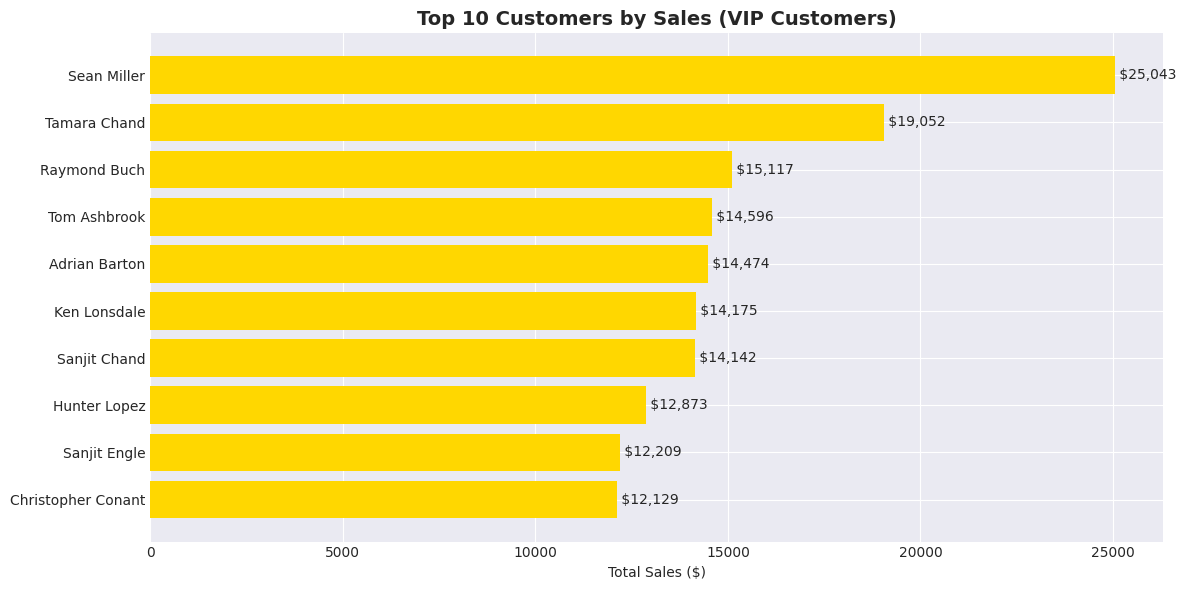


💡 Insight: Top 10 customers contribute $153,811.17 in revenue


In [12]:
# Query: Top 10 Customers
top_customers_query = """
SELECT 
    customer_name,
    COUNT(DISTINCT order_id) AS total_orders,
    ROUND(SUM(sales), 2) AS total_sales,
    ROUND(SUM(profit), 2) AS total_profit
FROM superstore
GROUP BY customer_name
ORDER BY total_sales DESC
LIMIT 10
"""

df_top_customers = pd.read_sql_query(top_customers_query, conn)

print("🏆 Top 10 Customers by Sales:")
display(df_top_customers)

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(df_top_customers['customer_name'], df_top_customers['total_sales'], color='gold')
ax.set_title('Top 10 Customers by Sales (VIP Customers)', fontsize=14, fontweight='bold')
ax.set_xlabel('Total Sales ($)')
ax.invert_yaxis()
for i, v in enumerate(df_top_customers['total_sales']):
    ax.text(v, i, f' ${v:,.0f}', va='center')

plt.tight_layout()
plt.savefig('../visualizations/06_top_customers.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n💡 Insight: Top 10 customers contribute ${df_top_customers['total_sales'].sum():,.2f} in revenue")

<a id='insights'></a>
## 8️⃣ Key Insights & Business Recommendations

### 🎯 Executive Summary

In [13]:
print("="*80)
print("📊 KEY BUSINESS INSIGHTS & RECOMMENDATIONS")
print("="*80)

# Compile key metrics
total_sales = df_business['total_sales'].values[0]
total_profit = df_business['total_profit'].values[0]
profit_margin = df_business['profit_margin_percent'].values[0]

print("\n✅ STRENGTHS:")
print(f"   1. Total Revenue: ${total_sales:,.2f}")
print(f"   2. Overall Profit Margin: {profit_margin:.2f}%")
print(f"   3. Top Region: {df_regional.iloc[0]['region']} (${df_regional.iloc[0]['total_sales']:,.2f})")
print(f"   4. Top Category: {df_category.iloc[0]['category']} (${df_category.iloc[0]['total_profit']:,.2f} profit)")

if len(df_loss) > 0:
    print("\n🚨 CRITICAL ISSUES:")
    print(f"   1. {len(df_loss)} sub-categories are LOSING MONEY")
    print(f"   2. Total Losses: ${df_loss['total_profit'].sum():,.2f}")
    print(f"   3. Worst Sub-Category: {df_loss.iloc[0]['sub_category']} (${df_loss.iloc[0]['total_profit']:,.2f})")

print("\n💡 RECOMMENDATIONS:")
print("   1. ⚠️  IMMEDIATE ACTION: Review pricing/discounting strategy for loss-making products")
print("   2. 📈 GROWTH OPPORTUNITY: Expand successful products in top-performing regions")
print("   3. 👥 CUSTOMER FOCUS: Implement VIP customer retention programs")
print("   4. 💰 PRICING STRATEGY: Optimize discount policies to improve margins")
print("   5. 📦 INVENTORY: Consider discontinuing consistently unprofitable items")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)

📊 KEY BUSINESS INSIGHTS & RECOMMENDATIONS

✅ STRENGTHS:
   1. Total Revenue: $2,297,200.86
   2. Overall Profit Margin: 12.47%
   3. Top Region: West ($725,457.82)
   4. Top Category: Technology ($145,454.95 profit)

🚨 CRITICAL ISSUES:
   1. 3 sub-categories are LOSING MONEY
   2. Total Losses: $-22,387.14
   3. Worst Sub-Category: Tables ($-17,725.48)

💡 RECOMMENDATIONS:
   1. ⚠️  IMMEDIATE ACTION: Review pricing/discounting strategy for loss-making products
   2. 📈 GROWTH OPPORTUNITY: Expand successful products in top-performing regions
   3. 👥 CUSTOMER FOCUS: Implement VIP customer retention programs
   4. 💰 PRICING STRATEGY: Optimize discount policies to improve margins
   5. 📦 INVENTORY: Consider discontinuing consistently unprofitable items

ANALYSIS COMPLETE


---

## 🎓 Project Summary

This analysis demonstrates:
- ✅ SQL database design and querying skills
- ✅ Python data analysis with pandas
- ✅ Data visualization with matplotlib
- ✅ Business insight extraction
- ✅ Actionable recommendations

**Tools Used:** SQL (SQLite), Python, Pandas, Matplotlib  
**Techniques:** Data cleaning, SQL querying, aggregations, window functions, visualization

---

In [14]:
# Close database connection
conn.close()
print("✅ Database connection closed")
print("\n📁 All visualizations saved to ../visualizations/ folder")

✅ Database connection closed

📁 All visualizations saved to ../visualizations/ folder
